In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Task 1. k-nearest neighbors algorithm (KNN)  

#### 1. Load Dataset [1 point]

- Load the csv file,'final_shuffled_breast_cancer100.csv' as `df`

In [2]:
df = pd.read_csv("final_shuffled_breast_cancer100.csv")

#### 2. Split the independent variable set and the target variable set [1 point]
- Assign `X` to the independent variable dataset
- Assign `y` to the target variable dataset

In [3]:
X = df.drop("target",axis=1)
y = df["target"]

#### 3. Split Dataset into the train & testset [1 point]
** When you use scikit-learn method to split the train & test set : 
- Set `random_state` to zero.
- the ratio of train set and test set is as follows : 80% train set / 20% test set
- Assign the variable names as follow : `X_train`, `X_test`, `y_train`, `y_test`

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

#### 4. Load  a KNN model by scikit-learn. [1 point]
- Assign KNN model as variable name `KNN`
- Set the `n_neighbors` hyperparameter as 5

In [5]:
KNN = KNeighborsClassifier(n_neighbors=5)

#### 5. Predict on your test set. [1 point]

In [6]:
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

#### 6. Evaluate the prediction result of your model. 

- Calculate the confusion matrix which consists of `TP`, `FP`, `TN`, `FN` (True Positive, False Positive, True Negative, False Negative)
- Calculate `accuracy rate`, `sensitivity`, `specificity`
- Fill in the blank function in order to accomplish the aforementioned  tasks. (DO NOT USE PACKAGES IN THIS TASK)

#### 6.1 Calculate the confusion matrix which consists of `TP`, `FP`, `TN`, `FN` (True Positive, False Positive, True Negative, False Negative) [5 points]
- Fill in the blank function in order to accomplish the aforementioned  tasks. (DO NOT USE PACKAGES IN THIS TASK)  

In [7]:
def cal_confusion(y_true, y_pred):
    
    """Calculate the confusion matrix from the predicted target value and the actual target value. Return TP,FP,TN,FN as the function output
    
    Args:
        y_true: actual target value
        y_pred: predicted target value

    Returns:
        confusion matrix components: TP, FP, TN, FN

    """
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    # TODO: Compute the compusion matrix
    list_y_true = list(y_true)
    for i in range(len(list_y_true)):
        if(list_y_true[i]==1):
            if(list_y_true[i]==y_pred[i]):
                TP+=1
            else:
                FN+=1
        else:
            if(list_y_true[i]==y_pred[i]):
                TN+=1
            else:
                FP+=1
    return TP, FP, TN, FN

#### 6.2 Calculate `accuracy rate` by filling in the blank of `cal_accuracy` function. [5 points]
- Fill in the blank function in order to accomplish the aforementioned  tasks. (DO NOT USE PACKAGES IN THIS TASK) 

In [8]:
def cal_accuracy(y_true, y_pred):
    
    """Calculate the accuracy rate from the predicted target value and the actual target value.
    Args:
        y_true: actual target value
        y_pred: predicted target value
    Returns:
        accuracy: calculataed accuracy rate
    """
    # TODO: Compute the accuracy rate'
    TP,FP,TN,FN = cal_confusion(y_true,y_pred)
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    return accuracy

#### 6.3 Calculate `sensitivity` by filling in the blank of `cal_sensitivity` function. [5 points]
- Fill in the blank function in order to accomplish the aforementioned  tasks. (DO NOT USE PACKAGES IN THIS TASK)

- When it comes to the `cal_sensitivity` function, we didn't specify the exact input variables, but just include all of `TP`, `FP`, `TN`, `FN`.  You have to choose two of them and use them as the input variables of the `cal_sensitivity` function.

In [9]:
def cal_sensitivity(TP,FP,TN,FN):
    
    """Calculate the sensitivity using the TP, FP, TN, and FN information obtained through the confusion matrix.    
    Args:
        TP,FP,TN,FN

    Returns:
        sensitivity: calculated sensitivity rate
    """
    # TODO: Compute the sensitivity rate
    sensitivity = TP/(TP+FN)
    return sensitivity

#### 6.4 Calculate `specificity` by filling in the blank of `cal_specificity` function. [5 points]
- Fill in the blank function in order to accomplish the aforementioned  tasks. (DO NOT USE PACKAGES IN THIS TASK)

- When it comes to the `cal_specificity` function, we didn't specify the exact input variables, but just include all of `TP`, `FP`, `TN`, `FN`.  You have to choose two of them and use them as the input variables of the `cal_specificity` function.

In [10]:
def cal_specificity(TP,FP,TN,FN):
    
    """Calculate the sensitivity using the TP, FP, TN, and FN information obtained through the confusion matrix.    
    Args:
        TP,FP,TN,FN

    Returns:
        specificity: calculated specificity rate

    """
    # TODO: Compute the specificity rate
    specificity = TN/(TN+FP)
    return specificity

#### 6.5 Print all of the results [1 point]

- print all of the results (confusion matrix, accuracy , sensitivity, specificity) 
- fill in the below `print` function by your own results

In [11]:
print('confusion matrix',cal_confusion(y_test,y_pred)     )
print('accuracy',    cal_accuracy(y_test,y_pred)         )
print('sensitivity', cal_sensitivity(*cal_confusion(y_test,y_pred))        )
print('specificity',  cal_specificity(*cal_confusion(y_test,y_pred))        )

confusion matrix (6, 2, 12, 0)
accuracy 0.9
sensitivity 1.0
specificity 0.8571428571428571


#### 6.6 Plot accuracy results as you change the K values. [3 points]
- Plot the accuracy results from changing the number of K = (1,2,3,4,5,10) 

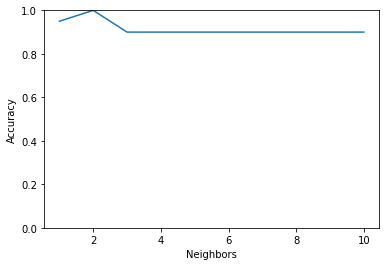

In [12]:
K = [1,2,3,4,5,10]
acc = []
for k in K:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_test)
    acc.append(cal_accuracy(y_test,y_pred))
plt.ylim([0,1])
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.plot(K,acc);